In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("placement.csv")

In [5]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [7]:
df.shape

(100, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [9]:
'''
Steps:
1. Preprocess + EDA + Feature selection
2. Extract input and output cols
3. Train Test Split
4. Train the model
5. Evaluate the model
6. Deploy the model
'''

'\nSteps:\n1. Preprocess + EDA + Feature selection\n2. Extract input and output cols\n3. Train Test Split\n4. Train the model\n5. Evaluate the model\n6. Deploy the model\n'

In [10]:
#Preprocessing
df = df.iloc[:,1:]

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [12]:
#EDA means looking the data insights
import matplotlib.pyplot as plt

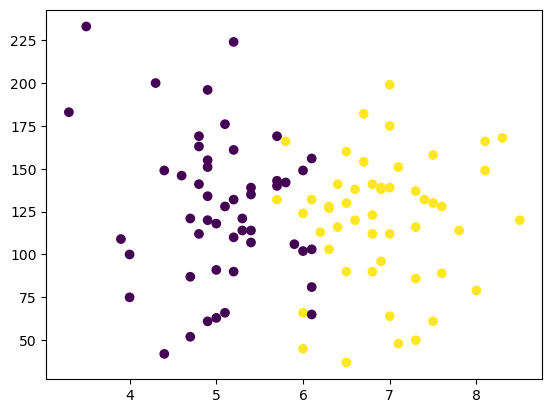

In [17]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [18]:
x = df.iloc[:,0:2]

In [19]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [26]:
y = df.iloc[:,-1]

In [27]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [29]:
x.shape


(100, 2)

In [30]:
y.shape

(100,)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [38]:
x_train

,cgpa,iq
10,6.0,45.0
47,5.2,161.0
22,4.9,120.0
52,7.0,175.0
2,5.3,121.0
...,...,...
20,6.6,120.0
45,6.0,66.0
96,4.4,42.0
57,6.5,130.0


In [39]:
y_train

10    1
47    0
22    0
52    1
2     0
     ..
20    1
45    1
96    0
57    1
76    0
Name: placement, Length: 90, dtype: int64

In [40]:
x_test

,cgpa,iq
37,8.1,149.0
48,6.6,138.0
34,4.8,163.0
38,6.5,160.0
88,4.4,149.0
5,7.1,48.0
32,7.0,139.0
36,5.7,140.0
0,6.8,123.0
94,4.7,52.0


In [41]:
y_test

37    1
48    1
34    0
38    1
88    0
5     1
32    1
36    0
0     1
94    0
Name: placement, dtype: int64

In [43]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
x_train = scaler.fit_transform(x_train)

In [49]:
x_train

array([[ 0.02547204, -1.96966399],
       [-0.67990743,  0.94835674],
       [-0.94442473, -0.08301266],
       [ 0.90719637,  1.30053165],
       [-0.591735  , -0.05785731],
       [-1.03259716, -0.28425547],
       [-0.23904526,  1.14959954],
       [ 2.053438  ,  1.12444419],
       [ 0.11364447, -0.51065363],
       [ 0.37816177,  0.44524971],
       [ 1.34805853,  0.87289068],
       [-0.76807986,  1.325687  ],
       [-0.85625229, -1.51686767],
       [ 0.11364447,  0.21885155],
       [ 1.87709313,  1.07413349],
       [-1.12076959, -0.05785731],
       [-2.35518366,  1.50177446],
       [ 0.7308515 ,  0.44524971],
       [-0.15087283,  1.07413349],
       [-0.50356256,  0.29431761],
       [ 1.34805853,  0.16854085],
       [ 1.34805853, -1.56717837],
       [ 0.28998934,  0.0930748 ],
       [ 0.2018169 , -0.25910012],
       [-0.50356256,  0.39493901],
       [ 0.81902393, -0.68674108],
       [-0.15087283,  0.47040506],
       [ 0.02547204,  0.64649252],
       [-1.82614906,

In [50]:
x_test = scaler.transform(x_test)

In [51]:
x_test

array([[ 1.87709313,  0.64649252],
       [ 0.55450663,  0.36978366],
       [-1.03259716,  0.99866744],
       [ 0.4663342 ,  0.92320138],
       [-1.38528689,  0.64649252],
       [ 0.9953688 , -1.89419794],
       [ 0.90719637,  0.39493901],
       [-0.23904526,  0.42009436],
       [ 0.7308515 , -0.00754661],
       [-1.12076959, -1.79357653]])

In [53]:
#model training
from sklearn.linear_model import LogisticRegression

In [54]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_pred = lr.predict(x_test)

In [56]:
y_test

37    1
48    1
34    0
38    1
88    0
5     1
32    1
36    0
0     1
94    0
Name: placement, dtype: int64

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test,y_pred)

1.0

<AxesSubplot:>

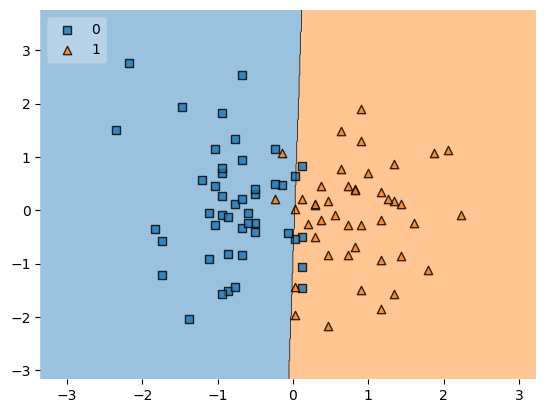

In [63]:
#decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=lr, legend=2)

In [64]:
import pickle

In [65]:
pickle.dump(lr,open('model.pkl','wb'))